In [1]:
## BEGIN PREAMBLE
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Vince/Google Drive/2nd Year/T3/DATAENG/TEP/dataeng_tep.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data cleaning and descriptive statistics

### Add columnsn needed for descriptive statistics

In [2]:
df1=df.copy()

In [3]:
df1['totalweight']=df1['cement']+df1['slag']+df1['flyash']+df1['water']+df1['superplasticizer']+df1['coarseaggregate']+df1['fineaggregate']

#create colum for percentage of each component
df1['cement_pct']=df1['cement']/df1['totalweight']*100
df1['slag_pct']=df1['slag']/df1['totalweight']*100
df1['flyash_pct']=df1['flyash']/df1['totalweight']*100
df1['water_pct']=df1['water']/df1['totalweight']*100
df1['splasticizer_pct']=df1['superplasticizer']/df1['totalweight']*100
df1['coarse_agg_pct']=df1['coarseaggregate']/df1['totalweight']*100
df1['fine_agg_pct']=df1['fineaggregate']/df1['totalweight']*100

In [4]:
df1.head() #displays the first 5 rows to check if the added columns are correct

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,totalweight,cement_pct,slag_pct,flyash_pct,water_pct,splasticizer_pct,coarse_agg_pct,fine_agg_pct
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,2420.5,22.309440,0.000000,0.0,6.692832,0.103284,42.966329,27.928114
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,2435.5,22.172039,0.000000,0.0,6.651612,0.102648,43.317594,27.756108
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2229.0,14.917003,6.393001,0.0,10.228802,0.000000,41.812472,26.648721
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2229.0,14.917003,6.393001,0.0,10.228802,0.000000,41.812472,26.648721
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,2326.9,8.534961,5.689974,0.0,8.251322,0.000000,42.047359,35.476385


## Display the descriptive statistics for the whole dataframe 

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895825,86.279342,0.000000,0.000000,22.000000,142.950000,359.400000
flyash,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300000,200.100000
water,1030.0,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200000
coarseaggregate,1030.0,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineaggregate,1030.0,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
csMPa,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000
totalweight,1030.0,2343.523398,65.365356,2194.600000,2291.150000,2349.100000,2390.400000,2551.000000


Take note of components with a minimum of 0. These ingredients are distinct for HPC and are not essential.

# Exploratory Data Analysis

## Compare the distribution of mass for each concrete component

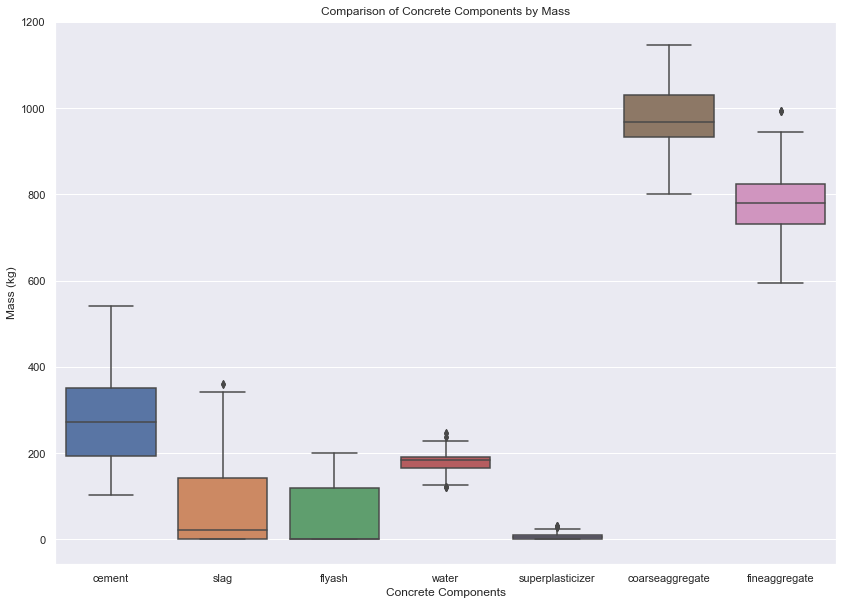

In [6]:
plt.figure(figsize=(14,10))
sns.set()
sns.boxplot(data=df1.iloc[:,0:7])
plt.ylabel('Mass (kg)')
plt.xlabel('Concrete Components')
plt.title('Comparison of Concrete Components by Mass')
plt.show()

Again, note the components having a minimum of zero.  

## Display the percentage of each component

Text(0.5, 1.0, 'Comparison of Concrete Component Percentage by Mass')

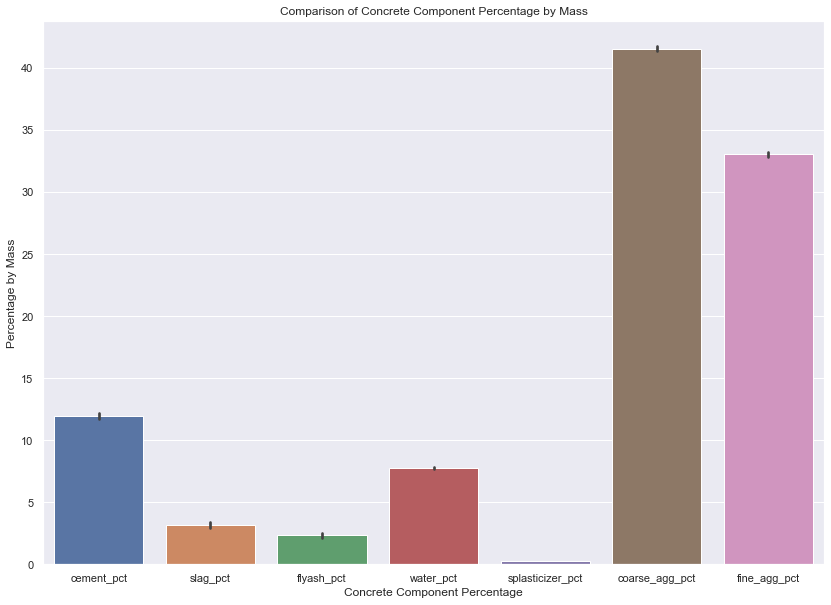

In [7]:
plt.figure(figsize=(14,10))
sns.set()
sns.barplot(data=df1.iloc[:,-7:17])
plt.ylabel('Percentage by Mass')
plt.xlabel('Concrete Component Percentage')
plt.title('Comparison of Concrete Component Percentage by Mass')

Note that we used a bar plot with error bars. This is because a pie chart may be able to show the mean percentage of the components, but it cannot show the standard error of the percentage. 

## Multiple Linear Regression

In [8]:
df['totalmass']=df.cement+df.slag+df.flyash+df.water+df.superplasticizer+df.coarseaggregate+df.fineaggregate

In [9]:
df.cement=df.cement/df.totalmass
df.slag=df.slag/df.totalmass
df.flyash=df.flyash/df.totalmass
df.water=df.water/df.totalmass
df.superplasticizer=df.superplasticizer/df.totalmass
df.coarseaggregate=df.coarseaggregate/df.totalmass
df.fineaggregate=df.fineaggregate/df.totalmass
df.age=np.log(df.age)

In [10]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,totalmass
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,3.332205,79.99,2420.5
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,3.332205,61.89,2435.5
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,5.598422,40.27,2229.0
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,5.899897,41.05,2229.0
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,5.886104,44.30,2326.9


In [11]:
dfx2=df.iloc[:,0:8]
dfx2.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,3.332205
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,3.332205
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,5.598422
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,5.899897
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,5.886104


### Calculate Variance Inflation Factor Values

In [12]:
for i in range(8):
    v=vif(np.matrix(dfx2[:-1]),i)
    print("Variance inflation factor for {}: {}".format(dfx2.columns[i],round(v,2)))

Variance inflation factor for cement: 15.37
Variance inflation factor for slag: 3.28
Variance inflation factor for flyash: 4.13
Variance inflation factor for water: 79.82
Variance inflation factor for superplasticizer: 5.43
Variance inflation factor for coarseaggregate: 86.13
Variance inflation factor for fineaggregate: 71.25
Variance inflation factor for age: 1.05


### Regression Proper

In [13]:
dfx2=sm.add_constant(dfx2)
model=sm.WLS(np.sqrt(df.csMPa),dfx2)
fitted=model.fit()
print(fitted.summary())

                            WLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.826
Model:                            WLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     694.5
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:47:15   Log-Likelihood:                -941.30
No. Observations:                1030   AIC:                             1899.
Df Residuals:                    1022   BIC:                             1938.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8771      1.494  

# Start Diagnostics

### Scatter plot to graphically check for linearity

c:\users\vince\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


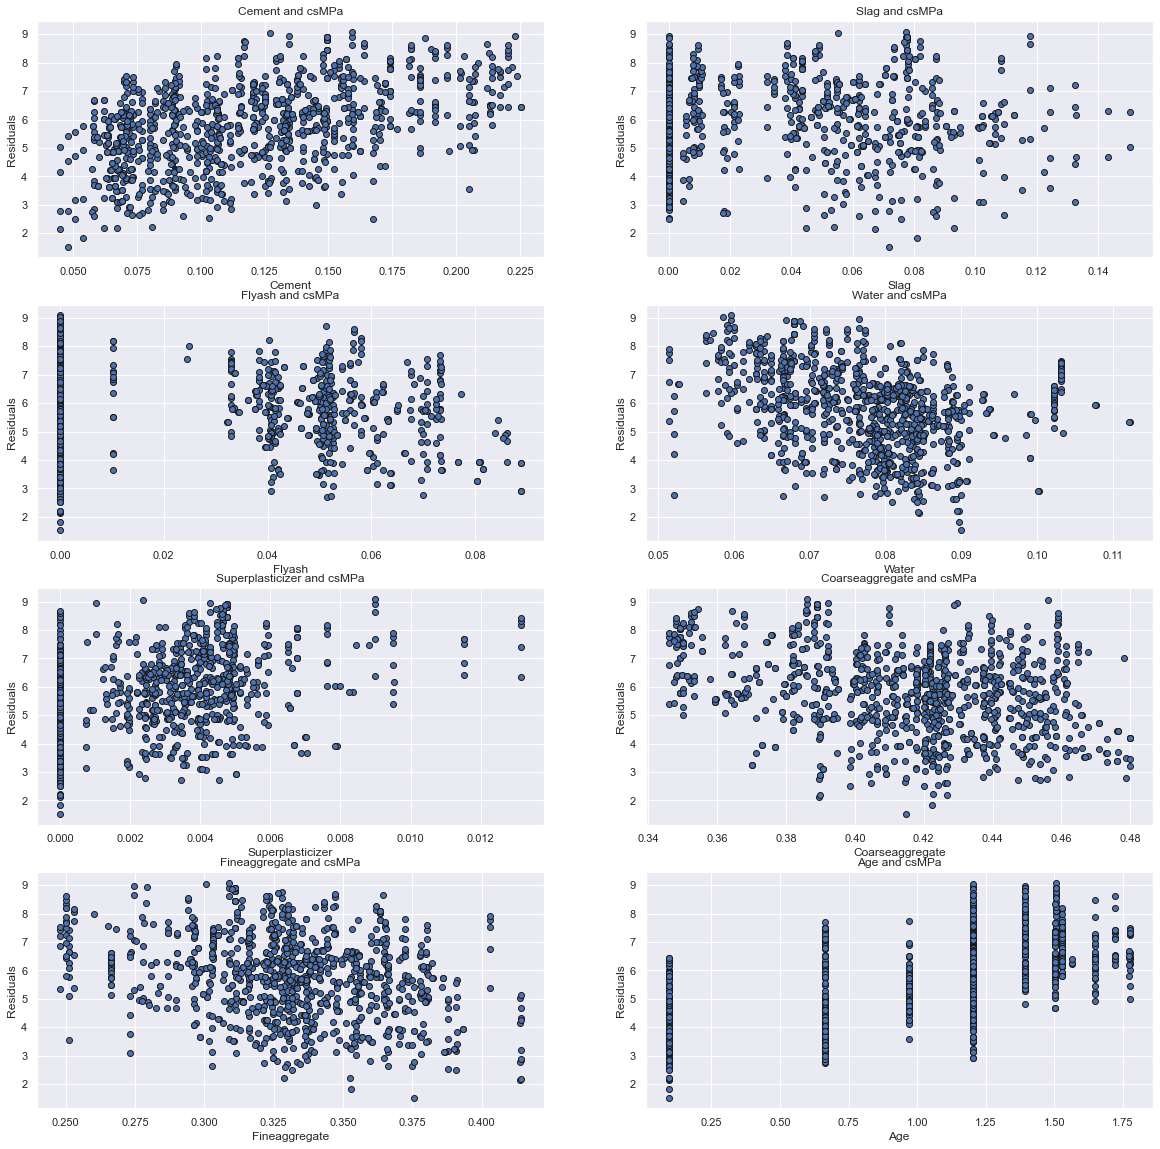

In [14]:
#linearity
plt.figure(figsize=(20,20))
sns.set()

plt.subplot(421)
p=plt.scatter(x=df.cement,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.cement)
xmax = max(df.cement)
plt.xlabel("Cement")
plt.ylabel("Residuals")
plt.title("Cement and csMPa")
plt.grid(True)

plt.subplot(422)
p=plt.scatter(x=df.slag,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.slag)
xmax = max(df.slag)
plt.xlabel("Slag")
plt.ylabel("Residuals")
plt.title("Slag and csMPa")
plt.grid(True)

plt.subplot(423)
p=plt.scatter(x=df.flyash,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.flyash)
xmax = max(df.flyash)
plt.xlabel("Flyash")
plt.ylabel("Residuals")
plt.title("Flyash and csMPa")
plt.grid(True)

plt.subplot(424)
p=plt.scatter(x=df.water,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.water)
xmax = max(df.water)
plt.xlabel("Water")
plt.ylabel("Residuals")
plt.title("Water and csMPa")
plt.grid(True)

plt.subplot(425)
p=plt.scatter(x=df.superplasticizer,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.superplasticizer)
xmax = max(df.superplasticizer)
plt.xlabel("Superplasticizer")
plt.ylabel("Residuals")
plt.title("Superplasticizer and csMPa")
plt.grid(True)

plt.subplot(426)
p=plt.scatter(x=df.coarseaggregate,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.coarseaggregate)
xmax = max(df.coarseaggregate)
plt.xlabel("Coarseaggregate")
plt.ylabel("Residuals")
plt.title("Coarseaggregate and csMPa")
plt.grid(True)

plt.subplot(427)
p=plt.scatter(x=df.fineaggregate,y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.fineaggregate)
xmax = max(df.fineaggregate)
plt.xlabel("Fineaggregate")
plt.ylabel("Residuals")
plt.title("Fineaggregate and csMPa")
plt.grid(True)

plt.subplot(428)
p=plt.scatter(x=np.log(df.age),y=np.sqrt(df.csMPa),edgecolor='k')
xmin=min(df.fineaggregate)
xmax = max(df.fineaggregate)
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Age and csMPa")
plt.grid(True)

plt.show()

#### Graphically check fo Homoscedasticity

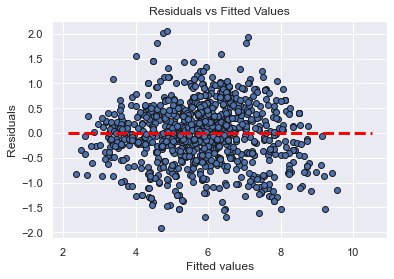

In [15]:
#Homoscedasticity
plt.figure()
sns.set()
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Graphically check for residual normality

<Figure size 1080x1800 with 0 Axes>

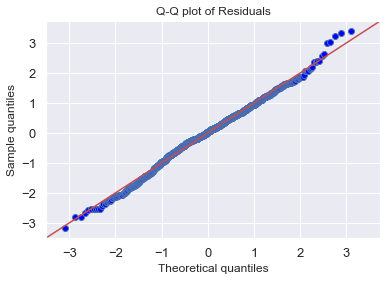

In [16]:
fig=plt.figure(figsize=(15,25))

sm.qqplot(fitted.resid,line='45',fit=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Residuals")
plt.show()

### -- End-- 